In [42]:

import torch
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datasetUtils import load_from_Jadson
from sklearn.metrics import confusion_matrix

In [43]:


#carregando labels

labels_teste = np.load("labels_test.npy")
labels_validation = np.load("labels_validation.npy")

print("tamanho de labels_teste: " + str(len(labels_teste)))
print("tamanho de labels_validation: " + str(len(labels_validation)))
#corregando dados

features_teste = torch.load("test.pt")
features_validation = torch.load("validation.pt")

print("tamanho de features_teste: " + str(features_teste.size()))
print("tamanho de features_validation: " + str(features_validation.size()))


tamanho de labels_teste: 24000
tamanho de labels_validation: 9600
tamanho de features_teste: torch.Size([24000, 2048])
tamanho de features_validation: torch.Size([9600, 2048])


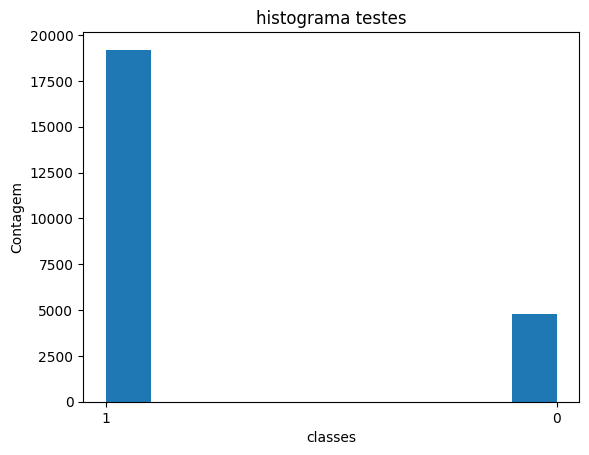

In [44]:

data = labels_teste
plt.hist(data)
plt.title("histograma testes")
plt.xlabel("classes")
plt.ylabel("Contagem")
plt.show()


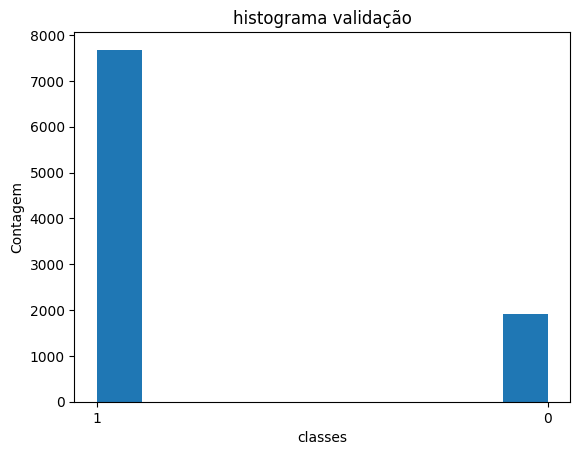

In [45]:

data = labels_validation
plt.hist(data)
plt.title("histograma validação")
plt.xlabel("classes")
plt.ylabel("Contagem")
plt.show()


In [47]:
def calc_predito(clusters, features, labels_ground_truth):
    
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(features)
    labels_kmt = kmeans.labels_

    for k in range(clusters):
        contagem = np.zeros(clusters)
        # para cada i em labels_kmt
        for indice, (el1,el2) in enumerate(zip(labels_kmt, labels_ground_truth)):
            if el1 == k: 
                contagem[int(el2)] +=1
        max = np.argmax(contagem)
        
        predito = np.zeros(len(labels_ground_truth))
        for indice, (el1,el2) in enumerate(zip(labels_kmt, labels_ground_truth)):
            if el1 == k:
                predito[indice] = int(max)
                
    return predito

# gerar matriz de confusão:
# carregar os labels de entrada nos csvs


base_name_dir = "/hadatasets/Synthetic-Realities/20-spoofing-mpad/2020-plosone-recod-mpad"
GT = load_from_Jadson("csvs/test_motog5.csv", base_name_dir)
GT = np.array([ int(item[1]) for item in GT])

predito = calc_predito(clusters=2,features=features_teste,labels_ground_truth=labels_teste)

print(GT)
print(predito)

y_true = GT
y_pred = predito

confusion = confusion_matrix(GT, predito)

print(confusion)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculando as métricas iniciais
# Calcular a acurácia (Accuracy)
accuracy = accuracy_score(y_true, y_pred)
 
# Calcular a precisão (Precision)
precision = precision_score(y_true, y_pred)
 
# Calcular o recall (Sensibilidade)
recall = recall_score(y_true, y_pred)
 
# Calcular o F1-Score
f1_score = f1_score(y_true, y_pred)

TP = confusion[0,0]
FN = confusion[0,1]
FP = confusion[1,0]
TN = confusion[1,1]
# # Calcular o APCER
# APCER = FN / (TP + FN)
#  
# # Calcular o BPCER
# BPCER = FP / (TN + FP)
# 
# print(f'APCER: {APCER}')
# print(f'BPCER: {BPCER}') 

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

############################################# fim da função: retorna lista com as métricas

# kmeans = KMeans(n_clusters=k)
# kmeans.fit(features_validation)
# labels_kmv = kmeans.labels_
# 
# 
# data = labels_kmt
# data = labels_validation
# plt.hist(data)
# plt.title("histograma k-means test")
# plt.xlabel("classes")
# plt.ylabel("Contagem")
# plt.show()
# 
# data = labels_kmv
# data = labels_validation
# plt.hist(data)
# plt.title("histograma k-means validation")
# plt.xlabel("classes")
# plt.ylabel("Contagem")
# plt.show()

/home/emorais/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]
[[4752   48]
 [9532 9668]]
Acurácia: 0.6008333333333333
Precisão: 0.9950596953478797
Recall: 0.5035416666666667
F1-Score: 0.6686955318854613
